In [ ]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
def plot_decision_boundry(model, x_f, y_f):
  x_min, x_max = x_f[:,0].min() - 0.1, x_f[:,0].max() + 0.1
  y_min, y_max = x_f[:,0].min() - 0.1, x_f[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                        np.linspace(y_min, y_max,100))
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x_f[:,0], x_f[:,1],c=y_f, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
np.linspace(1,9,9)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
def plot_hisotry(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["accuracy"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("Accuracy")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()


## **Binary classification**

In [ ]:
## Make the binary classification data
number_of_samples = 3000

X,y = datasets.make_moons(n_samples=number_of_samples,
                          shuffle=True,
                          noise=0.3,
                          random_state=42)

In [ ]:
## Check the shapes of our outputs
X.shape, y.shape

((3000, 2), (3000,))

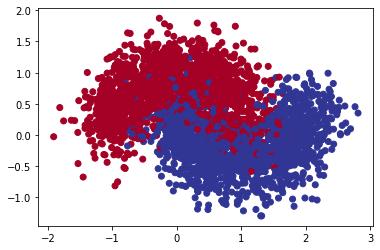

In [ ]:
## Visualize the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
## Visualize the data
import pandas as pd
pd = pd.DataFrame({"X0:":X[:,0], "X1": X[:,1], "Label": y})
pd

,X0:,X1,Label
0,-0.201636,-0.263595,1
1,-1.083089,0.512189,0
2,0.604966,-0.229744,1
3,0.751505,0.497196,0
4,1.388562,-0.380244,1
...,...,...,...
2995,0.260244,0.676581,1
2996,-0.537270,0.599897,0
2997,-0.970731,0.603940,0
2998,-0.545026,0.313783,0


#### Create and visualize the:
- train_data,
- test_data,

Text(0.5, 1.0, 'The test data')

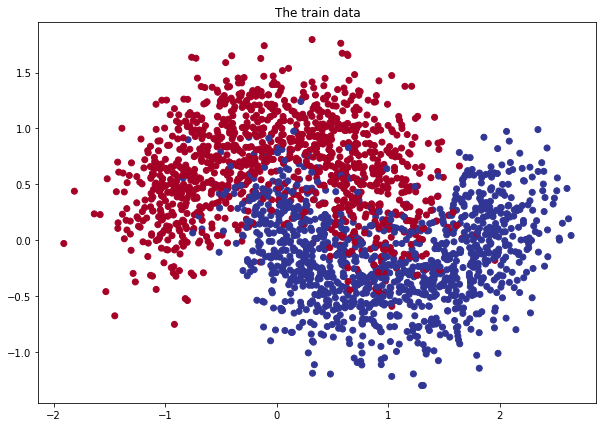

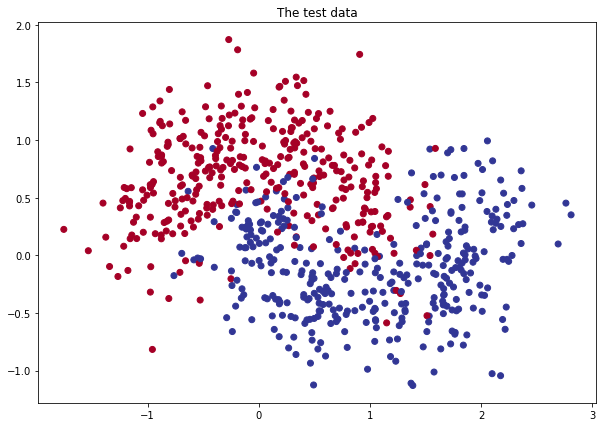

In [ ]:
# Train data
train_data = X[:2300]
train_labels = y[:2300]

# Test data
test_data = X[2300:]
test_labels = y[2300:]

# Train data
plt.figure(figsize=(10,7))
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,cmap=plt.cm.RdYlBu)
plt.title("The train data")

# Test
plt.figure(figsize=(10,7))
plt.scatter(test_data[:,0],test_data[:,1],c=test_labels,cmap=plt.cm.RdYlBu)
plt.title("The test data")


### Making models:
- **Model 0**: Single Dense layer
- **Model 1**: 2 Hidden Layers
- **Model 2**: 5 Hidden Layers
- **Model 3**: Model 1or2 + optimize learning rate

For every model:
- evaluate on test_data,
- plot decision boundry,
- plot history

### Model 0

In [ ]:
## Setting the same seed for all experiments
tf.random.set_seed(42)

EPOCHS = 100

In [ ]:
## Model 0

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data,train_labels,epochs=EPOCHS, verbose=0)

In [ ]:
## Evaluating model 0
model_0.evaluate(test_data, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8343


[0.330814003944397, 0.8342857360839844]

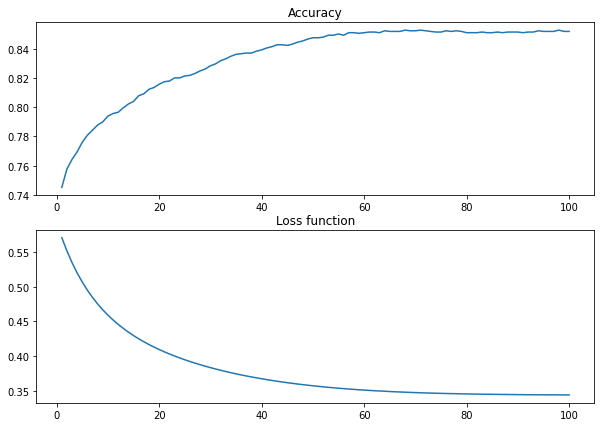

In [ ]:
plot_hisotry(history_0)

313/313 [==============================] - 0s 1ms/step
Binary classification


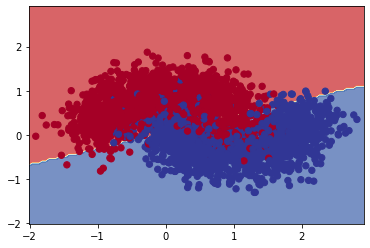

In [ ]:
## Plot decision boundry for all data
plot_decision_boundry(model_0, X, y)

313/313 [==============================] - 0s 1ms/step
Binary classification


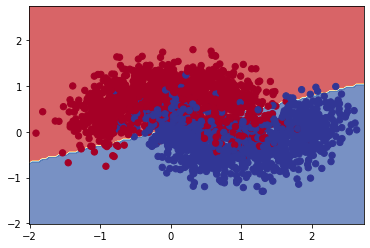

In [ ]:
## Plot decision boundry for train data
plot_decision_boundry(model_0, train_data, train_labels)

313/313 [==============================] - 0s 1ms/step
Binary classification


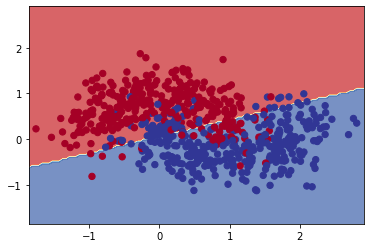

In [ ]:
## Plot decision boundry for test data
plot_decision_boundry(model_0, test_data, test_labels)

### Model 1

In [ ]:
## Model 1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,train_labels,epochs=EPOCHS, verbose=0)

In [ ]:
## Evaluating model 1
model_1.evaluate(test_data, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9243


[0.22033657133579254, 0.9242857098579407]

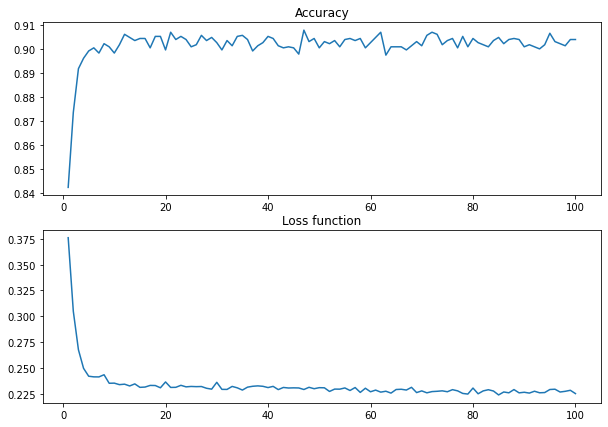

In [ ]:
plot_hisotry(history_1)

313/313 [==============================] - 0s 1ms/step
Binary classification


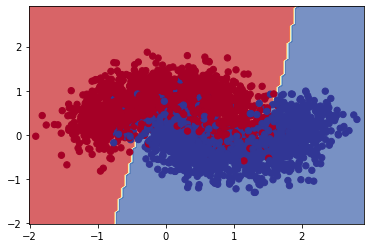

In [ ]:
## Plot decision boundry for all data
plot_decision_boundry(model_1, X, y)

313/313 [==============================] - 0s 2ms/step
Binary classification


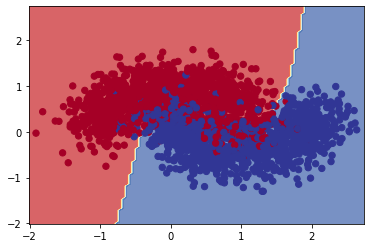

In [ ]:
## Plot decision boundry for train data
plot_decision_boundry(model_1, train_data, train_labels)

313/313 [==============================] - 0s 1ms/step
Binary classification


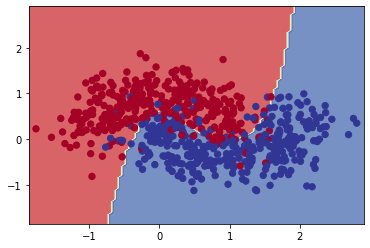

In [ ]:
## Plot decision boundry for test data
plot_decision_boundry(model_1, test_data, test_labels)

#### Model 2

In [ ]:
## Model 2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,train_labels,epochs=EPOCHS, verbose=0)

In [ ]:
## Evaluating model 2
model_2.evaluate(test_data, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9114


[0.23220381140708923, 0.9114285707473755]

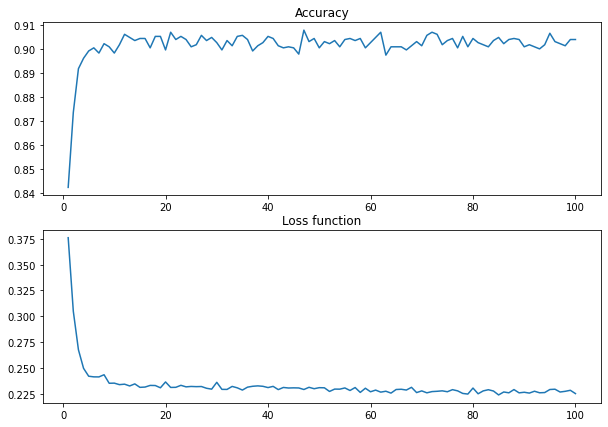

In [ ]:
plot_hisotry(history_1)

313/313 [==============================] - 1s 2ms/step
Binary classification


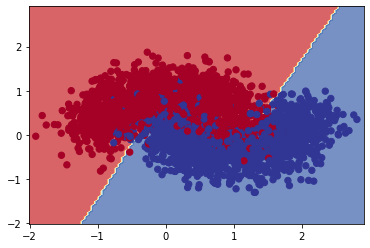

In [ ]:
## Plot decision boundry for all data
plot_decision_boundry(model_2, X, y)

313/313 [==============================] - 1s 2ms/step
Binary classification


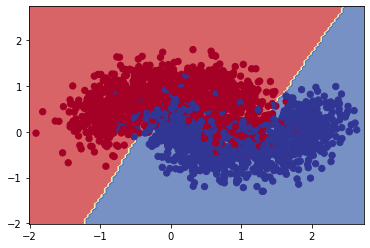

In [ ]:
## Plot decision boundry for train data
plot_decision_boundry(model_2, train_data, train_labels)

313/313 [==============================] - 1s 2ms/step
Binary classification


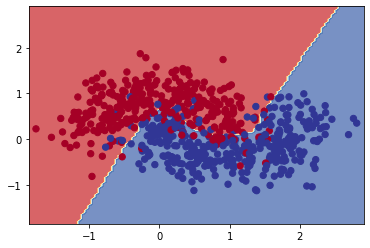

In [ ]:
## Plot decision boundry for test data
plot_decision_boundry(model_2, test_data, test_labels)

### Comparasion of first 3 models sll data

In [ ]:
## All data
val1 = model_0.evaluate(X,y)
val2 = model_1.evaluate(X,y)
val3 = model_2.evaluate(X,y)

print(f"Model 0 accuracy: {val1[1]},\n\
      Model 1 accuracy: {val2[1]},\n\
      Model 2 accuracy: {val3[1]}")

94/94 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9097
Model 0 accuracy: 0.8476666808128357,
      Model 1 accuracy: 0.9110000133514404,
      Model 2 accuracy: 0.9096666574478149


We will choose model 1 for optimizing its learing rate

### Model 3

In [ ]:
##Before fit we create callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/100))

## Model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,train_labels,epochs=EPOCHS, verbose=0, callbacks=[lr_schedule])


Text(0, 0.5, 'Loss')

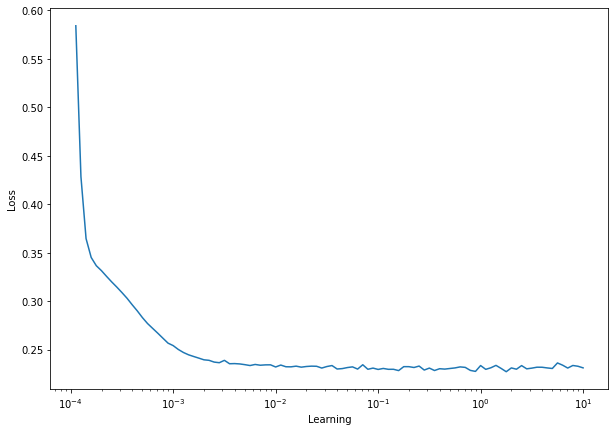

In [ ]:
lrs = [1e-4* 10**(epoch/20) for epoch in range(1,101)]
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning")
plt.ylabel("Loss")

We choose the learning rate equal to lr = 1e-3 (standard version) seems to be the best, but we will try to use lr = 0.3*1e-2

In [ ]:
## Model 3

model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.3*1e-2),
                metrics=["accuracy"])

history_3_1 = model_3_1.fit(train_data,train_labels,epochs=EPOCHS, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
## Evaluating model 3
model_3_1.evaluate(test_data, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9200


[0.22182446718215942, 0.9200000166893005]

In [ ]:
## Evaluate on all data
model_3_1.evaluate(X, y)

94/94 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9090


[0.2189805507659912, 0.9089999794960022]

### Model 1 seems to be the best option for this dataset and have accuracy of 91.1%
